In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

Reading Data

In [197]:
train_data = pd.read_csv("Loan_Status_train.csv")
test_data = pd.read_csv("Loan_Status_test.csv")

Data Preprocessing

In [187]:
print ("df_shape:", "train",(train_data.shape), "test",test_data.shape)

df_shape: train (614, 13) test (367, 12)


In [188]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [198]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [189]:
a = train_data.info()
b= train_data.Loan_ID.nunique()
print (a, b)
train_data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.drop(['Loan_ID'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 614


In [190]:
train_data['Loan_Status'].value_counts(normalize=True) 

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [191]:
#Handling Missing Data

train_data.isnull().sum()


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [192]:
#For categorical variables: imputation using mode 
#There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [193]:
#LoanAmount variable, we can use mean or median to impute the missing values
#We will use the median to fill the null values as earlier we saw that the loan amount has outliers 
#so the mean will not be the proper approach as it is highly affected by the presence of outliers
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [123]:
#removing Null values from test data

test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

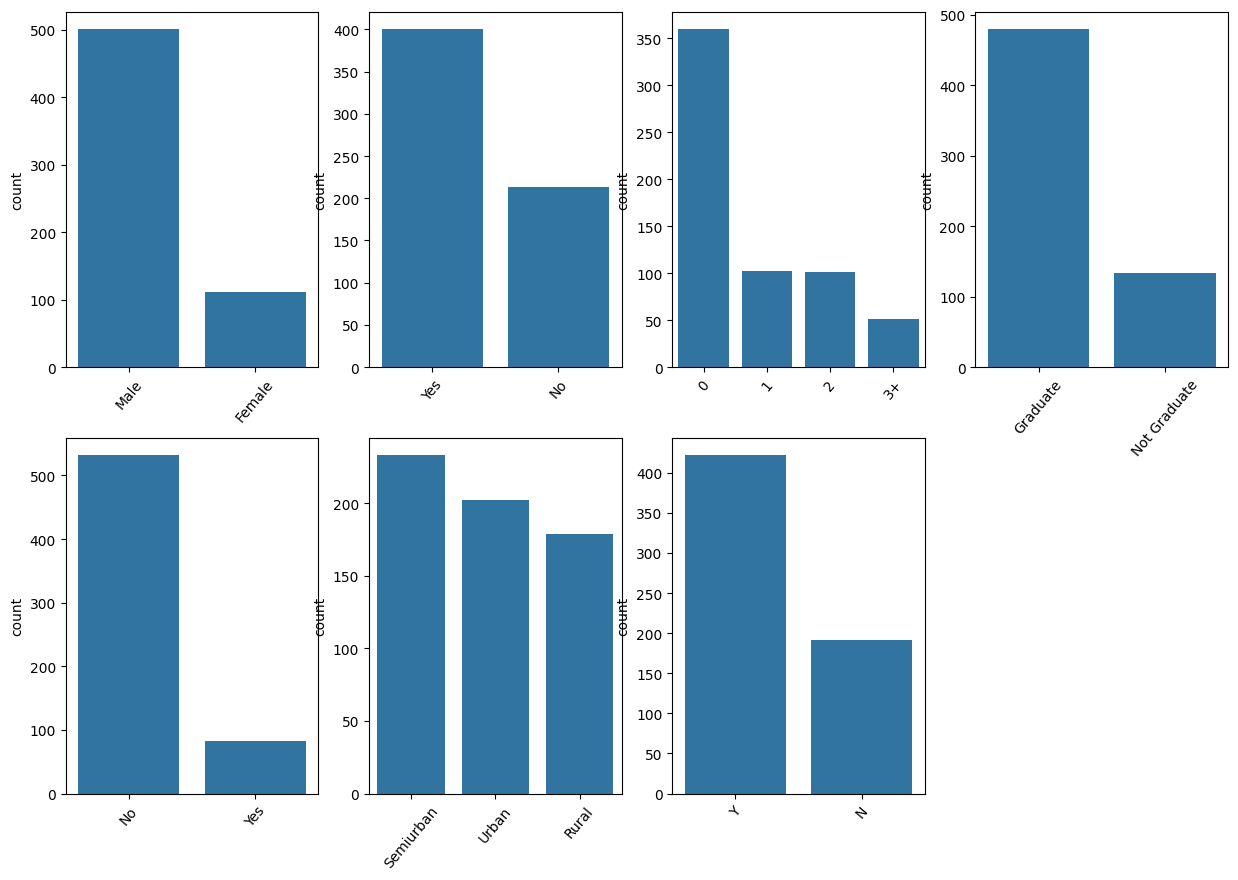

In [124]:
obj = (train_data.dtypes == 'object')
object_cols = list(obj[obj].index) 
plt.figure(figsize=(15,60)) 
index = 1

for col in object_cols: 
    y = train_data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=50) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1


In [125]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for col in train_data:
  train_data[col]= model.fit_transform(train_data[col])
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,81,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [126]:
#Model Training and Evaluation
from sklearn.model_selection import train_test_split 
  
X = train_data.drop(['Loan_Status'],axis=1) 
y = train_data['Loan_Status'] 
X.shape,y.shape 
  
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 11), (123, 11), (491,), (123,))

In [163]:

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score


In [171]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

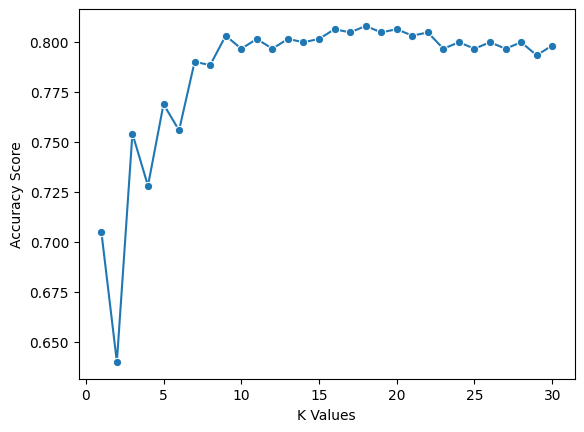

In [172]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [176]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
pred = knn.predict(x_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

accuracy = accuracy_score(y_train, pred)
precision = precision_score(y_train, pred)
recall = recall_score(y_train, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6585365853658537
Precision: 0.6810344827586207
Recall: 0.9404761904761905
Accuracy: 0.8065173116089613
Precision: 0.7872340425531915
Recall: 0.985207100591716


In [170]:
knn_r_acc = []
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    knn_r_acc.append((i, train_score, test_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

print(df)


     K  Test Score  Train Score
0    1    1.000000     0.691057
1    2    0.863544     0.463415
2    3    0.845214     0.682927
3    4    0.828921     0.682927
4    5    0.822811     0.682927
5    6    0.832994     0.422764
6    7    0.822811     0.609756
7    8    0.826884     0.512195
8    9    0.824847     0.658537
9   10    0.824847     0.650407
10  11    0.824847     0.682927
11  12    0.818737     0.691057
12  13    0.810591     0.691057
13  14    0.816701     0.691057
14  15    0.814664     0.682927
15  16    0.816701     0.674797
16  17    0.802444     0.682927
17  18    0.806517     0.658537
18  19    0.802444     0.682927


In [169]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=50, p=2, metric='minkowski', metric_params=None, n_jobs=None)                               #n_estimators can be 10 - 100  no big impact



rfc = RandomForestClassifier(n_estimators = 300, min_samples_leaf = 3, max_depth = 2,     #criterion{“gini”, “entropy”, “log_loss”}, default=”gini” Log_loss giving best score
                             criterion = 'log_loss', 
                             random_state =42)

svc = SVC() 

lc = LogisticRegression() 

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.02,
                                 random_state=0,
                                 max_features= 11)

tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=2)

gnb = GaussianNB()                                      #Naive Bayes Classifiers



# making predictions on the training set 
for models in (knn,rfc, svc,lc,gbc, tree_clf, gnb): 
    models.fit(x_train, y_train) 
    pred = models.predict(x_train)
    print (f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}")
    print (f"Precision Score: {precision_score(y_train, pred)*100:.2f}")
    print (f"Recall Score: {recall_score(y_train, pred)*100:.2f}")
    print (f"F1 Score: {f1_score(y_train, pred)}")








Accuracy Score: 81.47
Precision Score: 79.47
Recall Score: 98.52
F1 Score: 0.8797886393659181
Accuracy Score: 81.06
Precision Score: 79.24
Recall Score: 98.22
F1 Score: 0.8771466314398944
Accuracy Score: 82.08
Precision Score: 80.05
Recall Score: 98.52
F1 Score: 0.883289124668435
Accuracy Score: 81.06
Precision Score: 79.24
Recall Score: 98.22
F1 Score: 0.8771466314398944
Accuracy Score: 85.74
Precision Score: 83.33
Recall Score: 99.11
F1 Score: 0.9054054054054054
Accuracy Score: 81.87
Precision Score: 79.86
Recall Score: 98.52
F1 Score: 0.8821192052980132
Accuracy Score: 81.06
Precision Score: 79.24
Recall Score: 98.22
F1 Score: 0.8771466314398944


In [109]:
for clf in (knn,rfc, svc,lc,gbc, tree_clf,gnb): 
    clf.fit(x_train, y_train) 
    test_pred = clf.predict(x_test) 
    print (f"Accuracy Score: {accuracy_score(y_test, test_pred)*100:.2f}")
    print (f"Precision Score: {precision_score(y_test, test_pred)*100:.2f}")
    print (f"Recall Score: {recall_score(y_test, test_pred)*100:.2f}")
    print (f"F1 Score: {f1_score(y_test, test_pred)}")

Accuracy Score: 68.29
Precision Score: 68.60
Recall Score: 98.81
F1 Score: 0.8097560975609757
Accuracy Score: 80.49
Precision Score: 78.30
Recall Score: 98.81
F1 Score: 0.8736842105263158
Accuracy Score: 68.29
Precision Score: 68.29
Recall Score: 100.00
F1 Score: 0.8115942028985508
Accuracy Score: 80.49
Precision Score: 78.30
Recall Score: 98.81
F1 Score: 0.8736842105263158
Accuracy Score: 78.86
Precision Score: 77.88
Recall Score: 96.43
F1 Score: 0.8617021276595744
Accuracy Score: 79.67
Precision Score: 78.10
Recall Score: 97.62
F1 Score: 0.8677248677248677
Accuracy Score: 80.49
Precision Score: 78.30
Recall Score: 98.81
F1 Score: 0.8736842105263158


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1) 

xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)


n=100
params = {
    'objective': 'binary:logistic',
    'max_depth': 100,
    'learning_rate': 0.5,
}
 
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

preds = model.predict(xgb_test)
preds = preds.astype(int)

accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)


Accuracy of the model is: 31.70731707317073
